In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re  
import requests
from bs4 import BeautifulSoup

import unicodedata
from PIL import Image
import requests
from io import BytesIO
import tkinter as tk
from tkinter import Label
from PIL import Image, ImageTk
from io import BytesIO
import threading
from IPython.display import display

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox
import pandas as pd
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Dropdown, FloatRangeSlider, IntSlider, Checkbox, Layout, Output
import seaborn as sns



In [2]:
df=pd.read_csv('Datos\datos_subastas_procesado.csv')

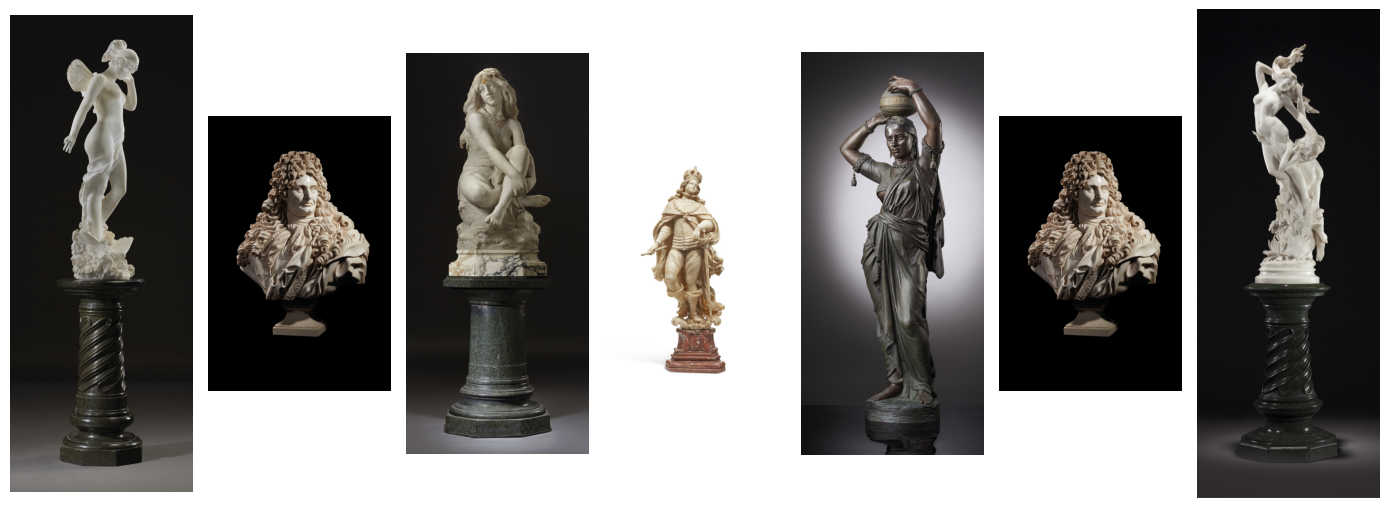

In [3]:
image_urls = [
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0029_000(a_batacchi_psyche062233).jpg',
    'https://www.christies.com/img/lotimages/2020/PAR/2020_PAR_18548_0099_000(buste_monumental_en_marbre_representant_jules_hardouin-mansart_dapres063419).jpg',
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0073_000(antonio_frilli_orientalist_beauty063453).jpg',
    'https://www.christies.com/img/lotimages/2023/PAR/2023_PAR_20692_0028_000(figure_representant_probablement_le_roi_charles_ii_despagne_sicile_ver122218).jpg',
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0074_000(charles-henri-joseph_cordier_torchere_femme_indienne_portant_un_vase_s063503).jpg',
    "https://www.christies.com/img/lotimages/2020/PAR/2020_PAR_18548_0099_000(buste_monumental_en_marbre_representant_jules_hardouin-mansart_dapres063419).jpg",
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0032_000(vittorio_caradossi_nypmhs062308).jpg'
]

images = []
for url in image_urls:
    response = requests.get(url)
    image_data = BytesIO(response.content)
    image = Image.open(image_data)
    images.append(image)

num_images = len(images)
columns = 7
rows = 1

fig, axes = plt.subplots(rows, columns, figsize=(14, 6*rows))

for i, (ax, image) in enumerate(zip(axes.flatten(), images)):
    ax.imshow(image)
    ax.axis('off')

for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------

# $$\large{\underline{\mathrm{Oferta \ de \ pintura \ clásica \ en \ la \ Casa \ de \ subastas }}}$$

#  $$ \underline{\LARGE{\underline{\mathrm{\mathbb{Christie´s}}}} } $$


#### $$ \textbf{Un viaje a través de los datos por la pintura de los Grandes \  Maestros.}  $$

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


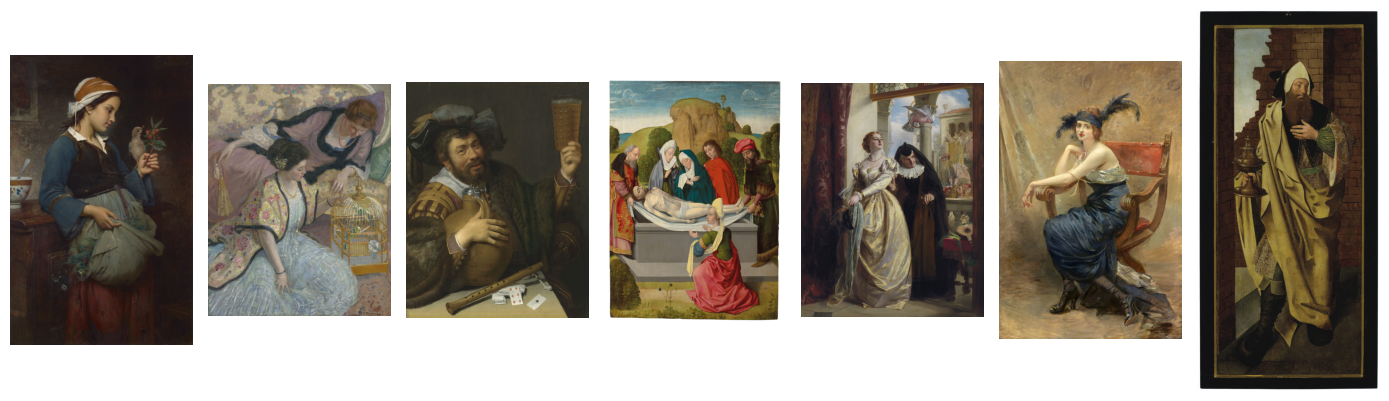

In [4]:
image_urls = [
    'https://www.christies.com/img/LotImages/2022/NYR/2022_NYR_20675_0022_000(emile-auguste_hublin_fillette_a_loiseau_d6365692055150).jpg',
    'https://www.christies.com/img/lotimages/2021/NYR/2021_NYR_20376_0019C_000(frederick_carl_frieseke_the_parrots044538).jpg',
    'https://www.christies.com/img/lotimages/2019/CKS/2019_CKS_17195_0032_000(willem_van_der_vliet_merry_drinker_with_a_large_jug_and_a_glass_of_bee101458).jpg',
    'https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18874_0007_000(netherlandish_school_circa_1470_the_entombment_of_christ083534).jpg',
    'https://www.christies.com/img/lotimages/2019/CKS/2019_CKS_17199_0033_000(john_callcott_horsley_ra_juliet_and_her_nurse110201).jpg',
    'https://www.christies.com/img/lotimages/2021/NYR/2021_NYR_19724_0035_000(madeleine_jeanne_lemaire_femme_assise_dans_un_fauteuil_dagobert060650).jpg',
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17655_0804_000(follower_of_hieronymus_bosch_the_wing_of_a_polyptych_the_flagellation083442).jpg'
]

images = []
for url in image_urls:
    response = requests.get(url)
    image_data = BytesIO(response.content)
    image = Image.open(image_data)
    images.append(image)

num_images = len(images)
columns = 7
rows = 1

fig, axes = plt.subplots(rows, columns, figsize=(14, 6*rows))

for i, (ax, image) in enumerate(zip(axes.flatten(), images)):
    ax.imshow(image)
    ax.axis('off')

for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()

plt.show()

In [5]:
df.head()

,Género,Medio,Soporte,Alto,Ancho,Número de piezas,Área total,Proporción,Nombre,Año de nacimiento,País,NumAP,Ciudad,Fecha,Mínimo estimado,Vendido,Máximo estimado,Precio_num,URL imagen
0,Retrato y figura humana,Óleo y témperas,Tabla,46.3,54.6,1.0,2527.98,0.847985,GABRIEL ZEHENDER,1527.0,Suiza,1,LONDON,2024-07-02,100000.0,1,150000.0,352800.0,https://www.christies.com/img/lotimages/2024/C...
1,Pintura religiosa,Óleo y témperas,Tabla,91.8,67.0,1.0,6150.60,1.370149,PIETER COECKE VAN AELST I,1502.0,Bélgica,4,LONDON,2024-07-02,150000.0,1,200000.0,680400.0,https://www.christies.com/img/lotimages/2024/C...
2,Retrato y figura humana,Óleo y témperas,Tabla,47.4,34.6,1.0,1640.04,1.369942,GEORGE GOWER,1538.0,Reino Unido,3,LONDON,2024-07-02,300000.0,1,500000.0,907200.0,https://www.christies.com/img/lotimages/2024/C...
3,Pintura religiosa,Óleo y témperas,Tabla,75.3,62.9,1.0,4736.37,1.197138,QUENTIN METSYS,1465.0,Bélgica,6,LONDON,2024-07-02,8000000.0,1,12000000.0,10660000.0,https://www.christies.com/img/lotimages/2024/C...
4,Pintura religiosa,Óleo y témperas,Tabla,72.1,54.5,1.0,3929.45,1.322936,MASTER OF THE LEGEND OF SAINT LUCY,1470.0,Bélgica,5,LONDON,2024-07-02,300000.0,1,500000.0,504000.0,https://www.christies.com/img/lotimages/2024/C...


$ \textbf{ Distribución de la oferta por paises y por años. } $  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Output, Layout


def count_artists_in_period(data, start_year, end_year):
    return data[(data['Año de nacimiento'] >= start_year) & (data['Año de nacimiento'] <= end_year)].groupby('Año de nacimiento')['Nombre'].nunique()

def plot_artists_over_time(selected_countries, selected_cities):
    period = 50  # Ventana de 50 años
    
    # Convertir a enteros los años mínimo y máximo
    min_year = int(df['Año de nacimiento'].min())
    max_year = int(df['Año de nacimiento'].max())
    
    years = range(min_year, max_year + 1)
    
    # Inicializar un contador de artistas por año
    total_artist_counts = [0] * len(years)
    
    # Filtrar los datos por países seleccionados
    country_data = df[df['País'].isin(selected_countries)]
    # Filtrar los datos por ciudades seleccionadas
    city_data = df[df['Ciudad'].isin(selected_cities)]
    
    # Si hay países seleccionados, sumar los conteos de artistas por país
    if selected_countries:
        country_artist_counts = [count_artists_in_period(country_data, year - period // 2, year + period // 2).sum() for year in years]
        total_artist_counts = [sum(x) for x in zip(total_artist_counts, country_artist_counts)]
    
    # Si hay ciudades seleccionadas, sumar los conteos de artistas por ciudad
    if selected_cities:
        city_artist_counts = [count_artists_in_period(city_data, year - period // 2, year + period // 2).sum() for year in years]
        total_artist_counts = [sum(x) for x in zip(total_artist_counts, city_artist_counts)]
    
    with output:
        output.clear_output(wait=True)
        plt.figure(figsize=(12, 6))
        plt.plot(years, total_artist_counts, label="Artistas agregados")
        plt.xlabel('Año')
        plt.ylabel('Artistas')
        plt.title('Número de Artistas representados por Periodo de Tiempo')
        plt.legend()
        plt.grid(True)
        plt.show()

# Lista de países y ciudades a considerar
countries = ['España', 'Estados Unidos', 'Alemania', 'Bélgica', 'Países Bajos', 'Francia', 'Reino Unido', 'Italia']
cities = df['Ciudad'].unique()

# Crear widgets de selección de países y ciudades
country_checkboxes = {country: widgets.Checkbox(value=True, description=country, layout=Layout(width='auto')) for country in countries}
city_checkboxes = {city: widgets.Checkbox(value=True, description=city, layout=Layout(width='auto')) for city in cities}

# Crear un contenedor horizontal para los botones de países con alineación centrada
country_selection = HBox(list(country_checkboxes.values()), layout=Layout(justify_content='center', margin='0 0 10px 0'))

# Crear un contenedor horizontal para los botones de ciudades con alineación centrada
city_selection = HBox(list(city_checkboxes.values()), layout=Layout(justify_content='center'))

# Crear un contenedor de salida para el gráfico
output = Output()

def update_plot(*args):
    selected_countries = [country for country, checkbox in country_checkboxes.items() if checkbox.value]
    selected_cities = [city for city, checkbox in city_checkboxes.items() if checkbox.value]
    plot_artists_over_time(selected_countries, selected_cities)

for checkbox in country_checkboxes.values():
    checkbox.observe(update_plot, 'value')

for checkbox in city_checkboxes.values():
    checkbox.observe(update_plot, 'value')

# Mostrar los widgets y el gráfico
display(VBox([country_selection, output, city_selection]))

# Mostrar el gráfico inicialmente
update_plot()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Output


# Obtener los años mínimos y máximos del dataset
min_year = int(df['Año de nacimiento'].min())
max_year = int(df['Año de nacimiento'].max())

# Obtener el rango máximo de artistas y obras por país en todo el dataset
max_artists_count = df.groupby('País')['Nombre'].nunique().max()
max_obras_count = df.groupby('País')['URL imagen'].nunique().max()

# Configuración del tamaño de los gráficos
fig_height = 3.1  # Reducir altura de los gráficos en pulgadas
fig_width = 5.4     # Reducir ancho de los gráficos en pulgadas

def plot_artists_by_country(filtered_df):
    # Contar la cantidad de artistas por país
    artist_counts = filtered_df.groupby('País')['Nombre'].nunique()
    
    with artists_output:
        artists_output.clear_output(wait=True)
        plt.figure(figsize=(fig_width, fig_height))
        artist_counts.sort_values().plot(kind='barh', color='skyblue')
        plt.xlabel('Cantidad de Artistas', fontsize=8)
        plt.ylabel('País', fontsize=8)
        plt.title('Cantidad de Artistas por País', fontsize=10)
        plt.xlim(0, max_artists_count)
        plt.tight_layout()
        plt.show()

def plot_obras_by_country(filtered_df):
    # Contar la cantidad de obras por país
    obras_counts = filtered_df.groupby('País')['URL imagen'].nunique()
    
    with obras_output:
        obras_output.clear_output(wait=True)
        plt.figure(figsize=(fig_width, fig_height))
        obras_counts.sort_values().plot(kind='barh', color='skyblue')
        plt.xlabel('Número de Obras', fontsize=8)
        plt.ylabel('País', fontsize=8)
        plt.title('Número de Obras por País', fontsize=10)
        plt.xlim(0, max_obras_count)
        plt.tight_layout()
        plt.show()

def update_artists_list(filtered_df):
    artist_info = filtered_df.groupby('Nombre').agg(
        fecha_nacimiento=('Año de nacimiento', 'first'),
        total_obras=('Nombre', 'size'),
        obras_vendidas=('Precio_num', lambda x: x.notna().sum()),
        precio_medio=('Precio_num', 'mean')
    ).reset_index()
    
    artist_info = artist_info.sort_values(by='total_obras', ascending=False).head(8)
    
    html_content = "<h3 style='text-align: center; font-size: 12px;'>Artistas más representados</h3><ul>"
    for _, row in artist_info.iterrows():
        html_content += f"<li style='font-size: 10px;'><strong>{row['Nombre']}</strong> (Nacido en {row['fecha_nacimiento']}) - " \
                        f"Total de obras: {row['total_obras']}, Vendidas: {row['obras_vendidas']}, " \
                        f"Precio medio: ${row['precio_medio']:.2f}</li>"
    html_content += "</ul>"
    
    artists_html.value = html_content

def update_highest_priced_artwork(filtered_df):
    # Encontrar la obra más cara
    if filtered_df['Precio_num'].notna().any():
        highest_priced_artwork = filtered_df.loc[filtered_df['Precio_num'].idxmax()]
        image_url = highest_priced_artwork['URL imagen']
        title = highest_priced_artwork['Nombre']
        price = highest_priced_artwork['Precio_num']
        
        # Ajustar el tamaño de la imagen
        img_height = fig_height * 100  # La altura del gráfico en píxeles
        img_width = fig_width * 100    # La anchura del gráfico en píxeles

        html_content = f"""
        <div style='display: flex; align-items: center; height: {fig_height * 100}px;'>
            <img src="{image_url}" style="max-height: {fig_height * 100}px; max-width: {fig_width * 100}px; object-fit: contain;"/>
            <div style='margin-left: 10px; font-size: 10px;'>
                <h3 style='font-size: 12px;'>Obra Más Cara</h3>
                <p><strong>Título:</strong> {title}</p>
                <p><strong>Precio:</strong> ${price:,.2f}</p>
            </div>
        </div>
        """
    else:
        html_content = "<h3 style='text-align: center;'>No hay obras vendidas en este periodo</h3>"
    
    highest_priced_artwork_html.value = html_content

def update_all(year_range):
    start_year, end_year = year_range
    filtered_df = df[(df['Año de nacimiento'] >= start_year) & (df['Año de nacimiento'] <= end_year)]
    plot_artists_by_country(filtered_df)
    plot_obras_by_country(filtered_df)
    update_artists_list(filtered_df)
    update_highest_priced_artwork(filtered_df)

# Crear el widget de rango
year_range_slider = widgets.IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=1,
    description='Periodo:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Crear contenedores de salida para los gráficos
artists_output = Output()
obras_output = Output()

# Crear contenedores HTML para la lista de artistas y la obra más cara
artists_html = widgets.HTML()
highest_priced_artwork_html = widgets.HTML()

# Crear el layout para los gráficos y la información
top_left = VBox([artists_output])
bottom_left = VBox([obras_output])
top_right = VBox([artists_html])
bottom_right = VBox([highest_priced_artwork_html])

# Disposición de los elementos en el cuadrante
top_half = HBox([top_left, top_right])
bottom_half = HBox([bottom_left, bottom_right])
main_box = VBox([top_half, bottom_half, year_range_slider])

# Conectar el control deslizante a la función de actualización
year_range_slider.observe(lambda change: update_all(change['new']), names='value')

# Mostrar los widgets y el gráfico
display(main_box)

# Mostrar el gráfico inicialmente
update_all(year_range_slider.value)


In [8]:
df_a_salvo=df
df=df.dropna()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Dropdown, IntSlider, Output, Layout
from IPython.display import display
import seaborn as sns
from PIL import Image
from io import BytesIO
import requests


# Asegúrate de que los datos necesarios están en el DataFrame
df = df.dropna(subset=['Precio_num', 'Año de nacimiento', 'Género', 'Medio', 'Soporte', 'URL imagen'])

class PriceTimeAnalysis:
    def __init__(self, df):
        self.df = df

        # Crear widgets
        self.year_slider = IntSlider(
            value=df['Año de nacimiento'].median(),
            min=df['Año de nacimiento'].min(),
            max=df['Año de nacimiento'].max(),
            step=1,
            description='Año:',
            continuous_update=False
        )
        
        self.genre_dropdown = Dropdown(
            options=['Todos'] + df['Género'].unique().tolist(),
            description='Género:',
            value='Todos'
        )
        
        self.medium_dropdown = Dropdown(
            options=['Todos'] + df['Medio'].unique().tolist(),
            description='Medio:',
            value='Todos'
        )
        
        self.support_dropdown = Dropdown(
            options=['Todos'] + df['Soporte'].unique().tolist(),
            description='Soporte:',
            value='Todos'
        )

        # Crear un contenedor de salida para los gráficos
        self.output_plot = Output()
        self.output_image = Output()
        
        # Configurar eventos
        self.year_slider.observe(self.update_plot, 'value')
        self.genre_dropdown.observe(self.update_plot, 'value')
        self.medium_dropdown.observe(self.update_plot, 'value')
        self.support_dropdown.observe(self.update_plot, 'value')

        # Crear el panel de filtros
        self.filter_panel = VBox([
            self.year_slider,
            self.genre_dropdown,
            self.medium_dropdown,
            self.support_dropdown
        ], layout=Layout(width='25%'))

        # Crear el panel de gráficos e imagen
        self.plot_and_image_panel = HBox([
            self.output_plot,
            self.output_image
        ], layout=Layout(width='75%'))

        # Crear el panel principal
        self.main_panel = VBox([
            self.filter_panel,
            self.plot_and_image_panel
        ])

        # Mostrar el panel principal
        display(self.main_panel)
        
        # Mostrar el gráfico inicialmente
        self.update_plot()

    def update_plot(self, *args):
        with self.output_plot:
            self.output_plot.clear_output(wait=True)
            
            # Obtener el año seleccionado y calcular el rango
            center_year = self.year_slider.value
            start_year = center_year - 25
            end_year = center_year + 25

            # Filtrar datos según los filtros aplicados
            filtered_df = self.df[
                (self.df['Año de nacimiento'] >= start_year) &
                (self.df['Año de nacimiento'] <= end_year)
            ]
            
            if self.genre_dropdown.value != 'Todos':
                filtered_df = filtered_df[filtered_df['Género'] == self.genre_dropdown.value]
                
            if self.medium_dropdown.value != 'Todos':
                filtered_df = filtered_df[filtered_df['Medio'] == self.medium_dropdown.value]
                
            if self.support_dropdown.value != 'Todos':
                filtered_df = filtered_df[filtered_df['Soporte'] == self.support_dropdown.value]
            
            if filtered_df.empty:
                print("No hay datos para mostrar con los filtros aplicados.")
                return

            # Calcular el precio medio por año y transformar a miles de euros
            mean_prices = filtered_df.groupby('Año de nacimiento')['Precio_num'].mean().reset_index()
            mean_prices['Precio_num'] = mean_prices['Precio_num'] / 1000  # Convertir a miles de euros

            # Mostrar el gráfico
            fig, ax = plt.subplots(figsize=(8, 5))  # Reducir tamaño del gráfico
            sns.lineplot(data=mean_prices, x='Año de nacimiento', y='Precio_num', ax=ax, marker='o')
            ax.set_xlabel('Año')
            ax.set_ylabel('Precio Medio (Miles de Euros)')
            ax.set_title(f'Precio Medio de Obras para Artistas Nacidos en {start_year} - {end_year}')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        with self.output_image:
            self.output_image.clear_output(wait=True)
            
            # Obtener la imagen de la obra más cara
            max_price_row = filtered_df.loc[filtered_df['Precio_num'].idxmax()]
            image_url = max_price_row['URL imagen']
            artist_name = max_price_row['Nombre']
            max_price = max_price_row['Precio_num'] / 1000  # Convertir a miles de euros

            # Mostrar la imagen
            if image_url:
                response = requests.get(image_url)
                img = Image.open(BytesIO(response.content))

                # Ajustar tamaño de la imagen para que encaje con el gráfico
                img_width, img_height = img.size
                aspect_ratio = img_height / img_width
                new_width = int(8 * 100)  # Ajusta la anchura de la imagen
                new_height = int(new_width * aspect_ratio)
                img = img.resize((new_width, new_height))
                
                # Mostrar la imagen y los detalles
                plt.figure(figsize=(8, 5))
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'Obra Más Cara\nArtista: {artist_name}\nPrecio: {max_price:.2f} Miles de Euros')
                plt.show()

# Crear y mostrar el análisis de precios
price_time_analysis = PriceTimeAnalysis(df)



In [10]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Output, Dropdown, FloatRangeSlider, IntRangeSlider, Button, Layout
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io
from IPython.display import display, clear_output
from threading import Thread
import time


class ImageViewer:
    def __init__(self, df):
        self.df = df
        self.image_index = 0
        self.image_urls = []
        self.auto_update_thread = None
        
        # Verificar y limpiar datos de género y país
        if 'Género' not in df.columns or df['Género'].isnull().all():
            df['Género'] = 'Desconocido'
        if 'País' not in df.columns or df['País'].isnull().all():
            df['País'] = 'Desconocido'
        
        # Crear widgets
        self.artist_dropdown = Dropdown(
            options=df['Nombre'].unique(),
            description='Artista:',
            value=df['Nombre'].unique()[0]
        )

        self.price_range_slider = FloatRangeSlider(
            value=[df['Precio_num'].min(), df['Precio_num'].max()],
            min=df['Precio_num'].min(),
            max=df['Precio_num'].max(),
            step=0.01,
            description='Rango de Precio:',
            continuous_update=False
        )

        self.period_range_slider = IntRangeSlider(
            value=[df['Año de nacimiento'].min(), df['Año de nacimiento'].max()],
            min=df['Año de nacimiento'].min(),
            max=df['Año de nacimiento'].max(),
            step=1,
            description='Periodo de Tiempo:',
            continuous_update=False
        )

        self.country_checkboxes = {country: widgets.Checkbox(value=True, description=country, layout=Layout(width='auto')) for country in df['País'].unique()}
        self.genre_checkboxes = {genre: widgets.Checkbox(value=True, description=genre, layout=Layout(width='auto')) for genre in df['Género'].unique()}

        self.prev_button = Button(description="Anterior", layout=Layout(width='auto'))
        self.next_button = Button(description="Siguiente", layout=Layout(width='auto'))

        self.image_output = Output()

        # Configurar eventos
        self.artist_dropdown.observe(self.update_images, 'value')
        self.price_range_slider.observe(self.update_images, 'value')
        self.period_range_slider.observe(self.update_images, 'value')
        for checkbox in self.country_checkboxes.values():
            checkbox.observe(self.update_images, 'value')
        for checkbox in self.genre_checkboxes.values():
            checkbox.observe(self.update_images, 'value')
        self.prev_button.on_click(self.prev_image)
        self.next_button.on_click(self.next_image)

        # Crear el panel de filtros
        self.filter_panel = VBox([
            self.artist_dropdown,
            self.price_range_slider,
            self.period_range_slider,
            HBox(list(self.country_checkboxes.values()), layout=Layout(justify_content='center')),
            HBox(list(self.genre_checkboxes.values()), layout=Layout(justify_content='center'))
        ])

        # Crear el panel de imágenes
        self.navigation_panel = HBox([self.prev_button, self.next_button])
        self.main_panel = HBox([self.filter_panel, VBox([self.image_output, self.navigation_panel])])

    def fetch_image(self, url):
        try:
            print(f"Intentando cargar la imagen desde: {url}")  # Depuración
            response = requests.get(url)
            if response.status_code == 200:
                image = Image.open(io.BytesIO(response.content))
                return image
            else:
                print(f"Error al descargar la imagen: Status code {response.status_code}")
                return None
        except Exception as e:
            print(f"Excepción al cargar la imagen: {e}")
            return None

    def filter_data(self):
        selected_artists = [self.artist_dropdown.value]
        price_range = self.price_range_slider.value
        period_range = self.period_range_slider.value
        selected_countries = [country for country, checkbox in self.country_checkboxes.items() if checkbox.value]
        selected_genres = [genre for genre, checkbox in self.genre_checkboxes.items() if checkbox.value]
        
        filtered_df = self.df[
            (self.df['Nombre'].isin(selected_artists)) &
            (self.df['Precio_num'] >= price_range[0]) & (self.df['Precio_num'] <= price_range[1]) &
            (self.df['Año de nacimiento'] >= period_range[0]) & (self.df['Año de nacimiento'] <= period_range[1]) &
            (self.df['País'].isin(selected_countries)) &
            (self.df['Género'].isin(selected_genres))
        ]
        
        self.image_urls = filtered_df['URL imagen'].tolist()
        print(f"URLs filtradas: {self.image_urls}")  # Depuración

    def show_image(self, index):
        with self.image_output:
            self.image_output.clear_output(wait=True)
            if not self.image_urls:
                print("No hay imágenes para mostrar.")
                return
            url = self.image_urls[index]
            image = self.fetch_image(url)
            if image:
                plt.figure(figsize=(8, 8))  # Ajusta el tamaño según tus necesidades
                plt.imshow(image)
                plt.axis('off')
                plt.show()
            else:
                print("No se pudo cargar la imagen.")

    def update_images(self, *args):
        self.filter_data()
        if not self.image_urls:
            with self.image_output:
                self.image_output.clear_output()
                print("No se encontraron imágenes con los filtros aplicados.")
            return
        self.image_index = 0
        self.show_image(self.image_index)
        if self.auto_update_thread is not None and self.auto_update_thread.is_alive():
            self.auto_update_thread.join()
        self.auto_update_thread = Thread(target=self.auto_update)
        self.auto_update_thread.start()

    def auto_update(self):
        while True:
            time.sleep(10)
            if self.image_urls:
                self.image_index = (self.image_index + 1) % len(self.image_urls)
                self.show_image(self.image_index)

    def prev_image(self, change):
        self.image_index = (self.image_index - 1) % len(self.image_urls)
        self.show_image(self.image_index)

    def next_image(self, change):
        self.image_index = (self.image_index + 1) % len(self.image_urls)
        self.show_image(self.image_index)

# Crear y mostrar el visor de imágenes
viewer = ImageViewer(df)
display(viewer.main_panel)



In [11]:
df=df_a_salvo